In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [237]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
historical_df = pd.read_csv('/content/drive/MyDrive/Classroom/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/Classroom/fear_greed_index.csv')

In [239]:
historical_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [240]:
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [241]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [242]:
historical_df['Trade Date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M' , errors='coerce').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [243]:
historical_df['Trade Date'].head()

,Trade Date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02


In [244]:
print(historical_df['Trade Date'].isnull().sum())


0


In [245]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [246]:
merged_df = pd.merge(historical_df, sentiment_df, left_on='Trade Date', right_on='date', how='left')

In [247]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Trade Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [248]:
print(merged_df['classification'].isnull().sum())
merged_df.dropna(subset=['classification'], inplace=True)
print(merged_df['classification'].isna().sum())

6
0


In [249]:
print(merged_df.count())

Account             211218
Coin                211218
Execution Price     211218
Size Tokens         211218
Size USD            211218
Side                211218
Timestamp IST       211218
Start Position      211218
Direction           211218
Closed PnL          211218
Transaction Hash    211218
Order ID            211218
Crossed             211218
Fee                 211218
Trade ID            211218
Timestamp           211218
Trade Date          211218
timestamp           211218
value               211218
classification      211218
date                211218
dtype: int64


In [250]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

In [251]:
print("Records by Market Sentiment:")
print(merged_df['classification'].value_counts())


Records by Market Sentiment:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


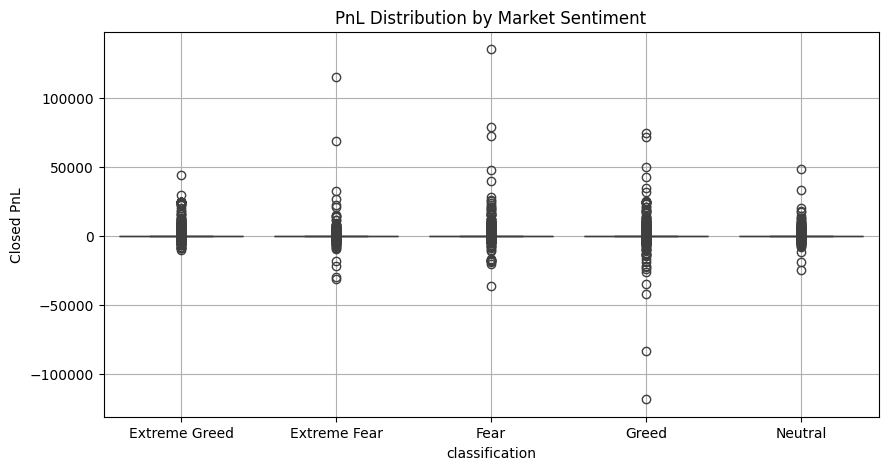

In [252]:
# 🔹 Plot 3: PnL Distribution by Sentiment
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('PnL Distribution by Market Sentiment')
plt.grid(True)
plt.show()


In [253]:
print("Average of combined loss and profit  during Fear and sell",merged_df.loc[(merged_df['Closed PnL'] != 0) &(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Fear'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Fear and BUY",merged_df.loc[(merged_df['Closed PnL'] != 0) &(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Fear'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Extreme Fear SELL",merged_df.loc[(merged_df['Closed PnL'] != 0) &(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Extreme Fear BUY",merged_df.loc[(merged_df['Closed PnL'] != 0)&(merged_df['Side']=='BUY')  & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Greed SELL",merged_df.loc[(merged_df['Closed PnL'] != 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Greed'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Greed BUY",merged_df.loc[(merged_df['Closed PnL'] != 0) &(merged_df['Side']=='BUY')& (merged_df['classification'] == 'Greed'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Extreme Greed sell",merged_df.loc[(merged_df['Closed PnL'] != 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Extreme Greed buy",merged_df.loc[(merged_df['Closed PnL'] != 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Neutral sell",merged_df.loc[(merged_df['Closed PnL'] != 0)  &(merged_df['Side']=='SELL')& (merged_df['classification'] == 'Neutral'), 'Closed PnL'].mean(),"USD")
print("Average of combined loss and profit  during Neutral buy",merged_df.loc[(merged_df['Closed PnL'] != 0)  &(merged_df['Side']=='BUY')& (merged_df['classification'] == 'Neutral'), 'Closed PnL'].mean(),"USD")

Average of combined loss and profit  during Fear and sell 69.10691041811643 USD
Average of combined loss and profit  during Fear and BUY 209.65042676684726 USD
Average of combined loss and profit  during Extreme Fear SELL 50.26318917877249 USD
Average of combined loss and profit  during Extreme Fear BUY 119.45034956804356 USD
Average of combined loss and profit  during Greed SELL 111.01515858794187 USD
Average of combined loss and profit  during Greed BUY 54.170553134444155 USD
Average of combined loss and profit  during Extreme Greed sell 176.0482516612555 USD
Average of combined loss and profit  during Extreme Greed buy 28.977039165999997 USD
Average of combined loss and profit  during Neutral sell 60.05086875914783 USD
Average of combined loss and profit  during Neutral buy 94.5939415714042 USD


In [254]:
print("Average during Fear",merged_df.loc[(merged_df['classification'] == 'Fear'), 'Closed PnL'].mean(),"USD")
print("Average during Greed",merged_df.loc[(merged_df['classification'] == 'Greed'), 'Closed PnL'].mean(),"USD")
print("Average during Extreme Fear",merged_df.loc[ (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].mean(),"USD")
print("Average during Extreme Greed",merged_df.loc[ (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].mean(),"USD")
print("Average during Neutral",merged_df.loc[(merged_df['classification'] == 'Neutral'), 'Closed PnL'].mean(),"USD")

Average during Fear 54.2903996254993 USD
Average during Greed 42.74355948851957 USD
Average during Extreme Fear 34.53786207897196 USD
Average during Extreme Greed 67.89286133909283 USD
Average during Neutral 34.30771839807886 USD


In [255]:
print("Average Loss during Fear",merged_df.loc[(merged_df['Closed PnL'] < 0) & (merged_df['classification'] == 'Fear'), 'Closed PnL'].mean(),"USD")
print("Average Loss during Greed",merged_df.loc[(merged_df['Closed PnL'] < 0) & (merged_df['classification'] == 'Greed'), 'Closed PnL'].mean(),"USD")
print("Average Loss during Extreme Fear",merged_df.loc[(merged_df['Closed PnL'] < 0) & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].mean(),"USD")
print("Average Loss during Extreme Greed",merged_df.loc[(merged_df['Closed PnL'] < 0) & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].mean(),"USD")
print("Average Loss during Neutral",merged_df.loc[(merged_df['Closed PnL'] < 0) & (merged_df['classification'] == 'Neutral'), 'Closed PnL'].mean(),"USD")

Average Loss during Fear -156.6624008867775 USD
Average Loss during Greed -181.9673288169474 USD
Average Loss during Extreme Fear -257.099628909899 USD
Average Loss during Extreme Greed -119.92028871801683 USD
Average Loss during Neutral -121.72784874202627 USD


In [256]:
print("Average Profit during Fear",merged_df.loc[(merged_df['Closed PnL'] > 0) & (merged_df['classification'] == 'Fear'), 'Closed PnL'].mean(),"USD")
print("Average Profit during Greed",merged_df.loc[(merged_df['Closed PnL'] > 0) & (merged_df['classification'] == 'Greed'), 'Closed PnL'].mean(),"USD")
print("Average Profit during Extreme Fear",merged_df.loc[(merged_df['Closed PnL'] > 0) & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].mean(),"USD")
print("Average Profit during Extreme Greed",merged_df.loc[(merged_df['Closed PnL'] > 0) & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].mean(),"USD")
print("Average Profit during Neutral",merged_df.loc[(merged_df['Closed PnL'] > 0) & (merged_df['classification'] == 'Neutral'), 'Closed PnL'].mean(),"USD")

Average Profit during Fear 151.84093464783427 USD
Average Profit during Greed 165.7617105076971 USD
Average Profit during Extreme Fear 173.42476737384948 USD
Average Profit during Extreme Greed 160.59326895165108 USD
Average Profit during Neutral 112.43943157723415 USD


In [257]:
print("Here we are not considering that has PnL vlaue 0")
print("Average during Fear",merged_df.loc[(merged_df['Closed PnL'] != 0) & (merged_df['classification'] == 'Fear'), 'Closed PnL'].mean(),"USD")
print("Average during Greed",merged_df.loc[(merged_df['Closed PnL'] != 0) & (merged_df['classification'] == 'Greed'), 'Closed PnL'].mean(),"USD")
print("Average during Extreme Fear",merged_df.loc[(merged_df['Closed PnL'] != 0) & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].mean(),"USD")
print("Average during Extreme Greed",merged_df.loc[(merged_df['Closed PnL'] != 0) & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].mean(),"USD")
print("Average during Neutral",merged_df.loc[(merged_df['Closed PnL'] != 0) & (merged_df['classification'] == 'Neutral'), 'Closed PnL'].mean(),"USD")

Here we are not considering that has PnL vlaue 0
Average during Fear 112.62598770940687 USD
Average during Greed 85.40392727005876 USD
Average during Extreme Fear 71.02731582644627 USD
Average during Extreme Greed 130.20530910051312 USD
Average during Neutral 71.19999314664905 USD


In [258]:
fearProf=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Fear'), 'Closed PnL'].count()
# print("Fear Profit on SELL",fearProf)
fearLoss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Fear'), 'Closed PnL'].count()
fear=merged_df.loc[(merged_df['classification'] == 'Fear')&(merged_df['Side']=='SELL') , 'Closed PnL'].count()
# print("Fear Loss on SELL",fearLoss)
# print("fear",(fear),fearProf+fearLoss)
print("Fear Win Rate on SELL",fearProf/fear)
fearProf=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Fear'), 'Closed PnL'].count()
fearLoss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Fear'), 'Closed PnL'].count()
fear=merged_df.loc[(merged_df['classification'] == 'Fear')&(merged_df['Side']=='BUY') , 'Closed PnL'].count()
# print("Fear Loss on BUY",fearLoss)
# print("fear",(fear))
print("Fear Win Rate on BUY",fearProf/fear)
print('-------------------------------------------------------')
greedProf=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Greed'), 'Closed PnL'].count()
# print("Greed Profit on SELL",greedProf)
greedLoss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Greed'), 'Closed PnL'].count()
greedsell=merged_df.loc[(merged_df['classification'] == 'Greed')&(merged_df['Side']=='SELL') , 'Closed PnL'].count()
print("Greed Win Rate on SELL",greedProf/greedsell)
greedProf=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Greed'), 'Closed PnL'].count()
greedLoss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Greed'), 'Closed PnL'].count()
greedbuy=merged_df.loc[(merged_df['classification'] == 'Greed')&(merged_df['Side']=='BUY') , 'Closed PnL'].count()
print("Greed Win Rate on BUY",greedProf/greedbuy)
print('-------------------------------------------------------')
ExtremefearProf=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].count()
ExtremefearLoss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].count()
Extremefearsell=merged_df.loc[(merged_df['classification'] == 'Extreme Fear')&(merged_df['Side']=='SELL') , 'Closed PnL'].count()
print("ExtremeFear Win Rate on SELL",ExtremefearProf/Extremefearsell)
ExtremefearProf=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].count()
ExtremefearLoss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Extreme Fear'), 'Closed PnL'].count()
Extremefear=merged_df.loc[(merged_df['classification'] == 'Extreme Fear')&(merged_df['Side']=='BUY') , 'Closed PnL'].count()
print("ExtremeFear Win Rate on BUY",ExtremefearProf/Extremefear)
print('-------------------------------------------------------')
ExtremegreedProf=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].count()
ExtremegreedLoss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].count()
Extremegreed=merged_df.loc[(merged_df['classification'] == 'Extreme Greed')&(merged_df['Side']=='SELL') , 'Closed PnL'].count()
print("Extreme Greed Win Rate on SELL",ExtremegreedProf/Extremegreed)
ExtremegreedProf=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].count()
ExtremegreedLoss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Extreme Greed'), 'Closed PnL'].count()
Extremegred=merged_df.loc[(merged_df['classification'] == 'Extreme Greed')&(merged_df['Side']=='BUY') , 'Closed PnL'].count()
print("Extreme Greed Win Rate on BUY",ExtremegreedProf/Extremegred)
print('-------------------------------------------------------')
neutralprof=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Neutral'), 'Closed PnL'].count()
neutralloss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='SELL') & (merged_df['classification'] == 'Neutral'), 'Closed PnL'].count()
neutral=merged_df.loc[(merged_df['classification'] == 'Neutral')&(merged_df['Side']=='SELL') , 'Closed PnL'].count()
print("Neutral Win Rate on SELL",neutralprof/neutral)
neutralprof=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Neutral'), 'Closed PnL'].count()
neutralloss=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Side']=='BUY') & (merged_df['classification'] == 'Neutral'), 'Closed PnL'].count()
neutral=merged_df.loc[(merged_df['classification'] == 'Neutral')&(merged_df['Side']=='BUY') , 'Closed PnL'].count()
print("Neutral Win Rate on BUY",greedProf/neutral)
print('-------------------------------------------------------')


Fear Win Rate on SELL 0.572053093420344
Fear Win Rate on BUY 0.2629996696399075
-------------------------------------------------------
Greed Win Rate on SELL 0.44859486142962646
Greed Win Rate on BUY 0.3180745442708333
-------------------------------------------------------
ExtremeFear Win Rate on SELL 0.5471571906354515
ExtremeFear Win Rate on BUY 0.20164609053497942
-------------------------------------------------------
Extreme Greed Win Rate on SELL 0.5898331217123164
Extreme Greed Win Rate on BUY 0.3114269788182832
-------------------------------------------------------
Neutral Win Rate on SELL 0.5560720200886894
Neutral Win Rate on BUY 0.4120934155727766
-------------------------------------------------------


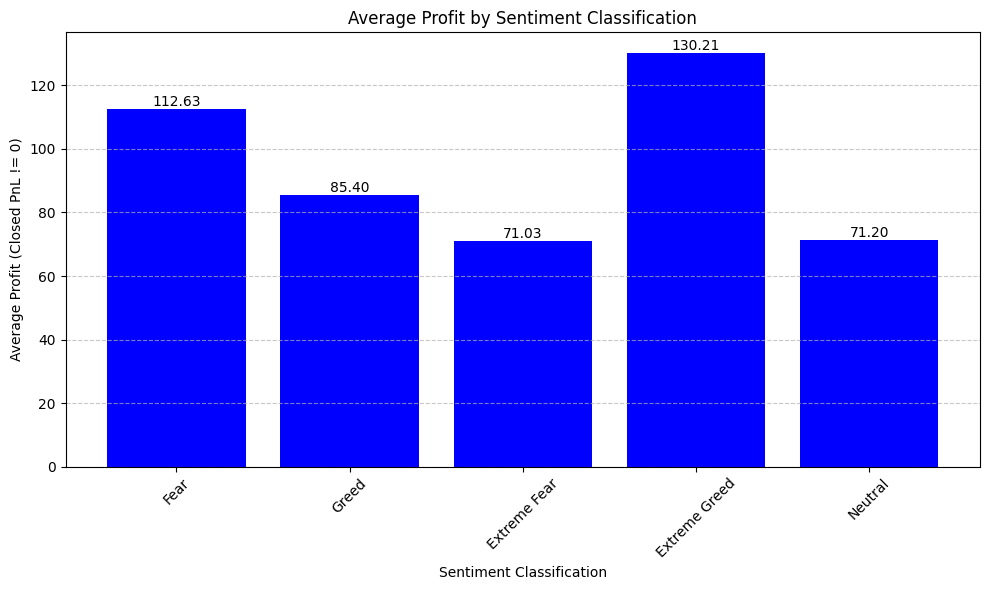

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

# Sentiment categories you're interested in
sentiments = ['Fear', 'Greed', 'Extreme Fear', 'Extreme Greed', 'Neutral']

# Calculate average Closed PnL for positive PnL values under each sentiment
avg_profits = {
    sentiment: merged_df.loc[
        (merged_df['Closed PnL'] != 0) & (merged_df['classification'] == sentiment),
        'Closed PnL'
    ].mean()
    for sentiment in sentiments
}

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_profits.keys(), avg_profits.values(), color='blue')

# Add labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Profit (Closed PnL != 0)')
plt.title('Average Profit by Sentiment Classification')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on bars
for i, v in enumerate(avg_profits.values()):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


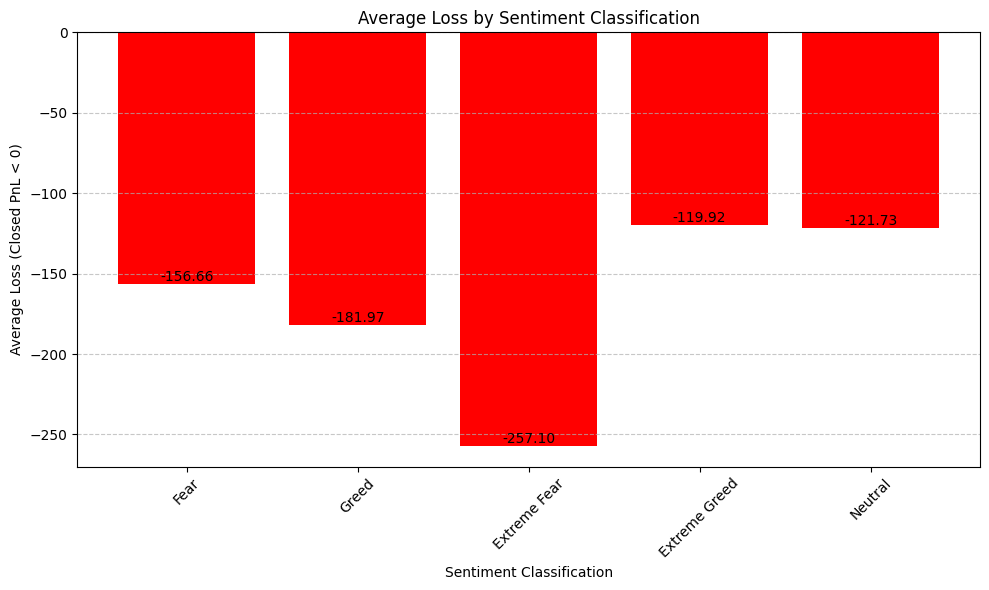

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

# Sentiment categories you're interested in
sentiments = ['Fear', 'Greed', 'Extreme Fear', 'Extreme Greed', 'Neutral']

# Calculate average Closed PnL for negative PnL values under each sentiment
avg_losses = {
    sentiment: merged_df.loc[
        (merged_df['Closed PnL'] < 0) & (merged_df['classification'] == sentiment),
        'Closed PnL'
    ].mean()
    for sentiment in sentiments
}

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_losses.keys(), avg_losses.values(), color='red')

# Add labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Loss (Closed PnL < 0)')
plt.title('Average Loss by Sentiment Classification')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on bars
for i, v in enumerate(avg_losses.values()):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v < 0 else 'top', color='black')

plt.tight_layout()
plt.show()


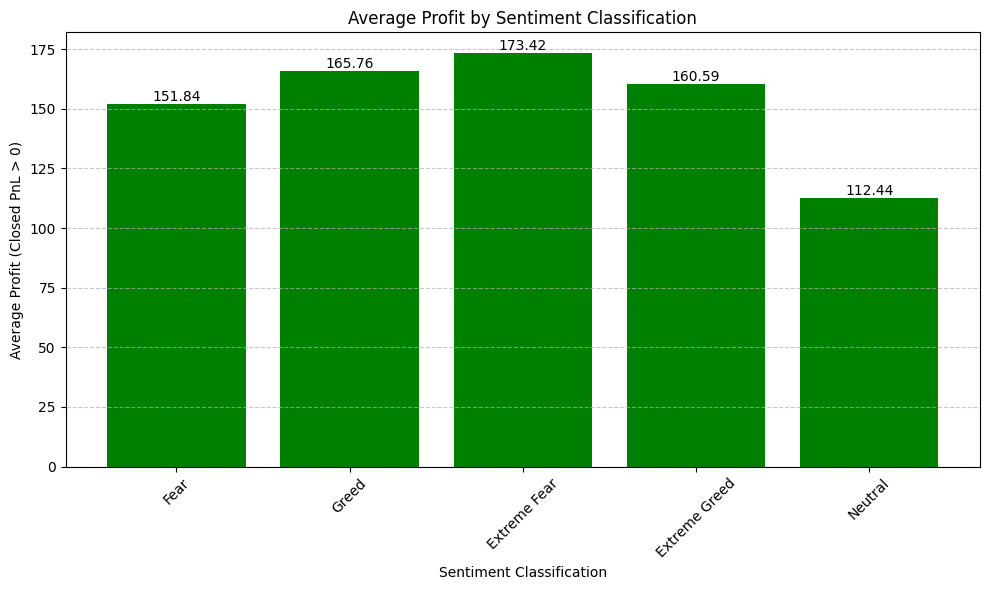

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# Sentiment categories you're interested in
sentiments = ['Fear', 'Greed', 'Extreme Fear', 'Extreme Greed', 'Neutral']

# Calculate average Closed PnL for positive PnL values under each sentiment
avg_profits = {
    sentiment: merged_df.loc[
        (merged_df['Closed PnL'] > 0) & (merged_df['classification'] == sentiment),
        'Closed PnL'
    ].mean()
    for sentiment in sentiments
}
# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_profits.keys(), avg_profits.values(), color='green')

# Add labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Profit (Closed PnL > 0)')
plt.title('Average Profit by Sentiment Classification')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on bars
for i, v in enumerate(avg_profits.values()):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


/tmp/ipython-input-262-3736049794.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i] - width, loss_counts[i], str(int(loss_counts[i])), ha='center', va='bottom', fontsize=9)
/tmp/ipython-input-262-3736049794.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], breakeven_counts[i], str(int(breakeven_counts[i])), ha='center', va='bottom', fontsize=9)
/tmp/ipython-input-262-3736049794.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by

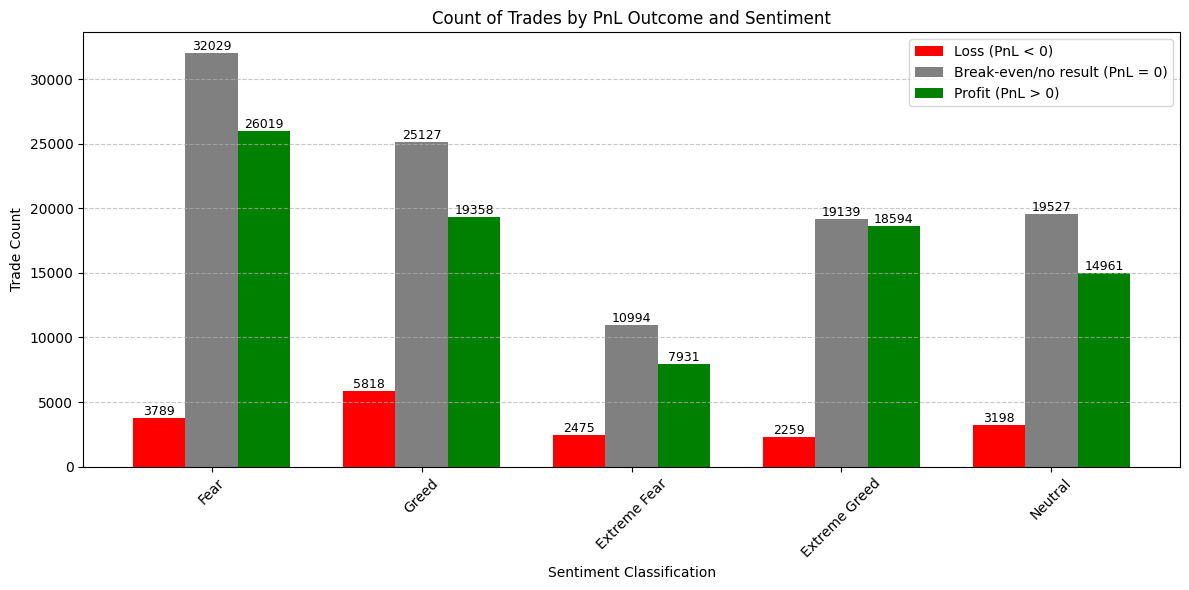

In [262]:
import matplotlib.pyplot as plt
import numpy as np

# List of sentiment categories
sentiments = ['Fear', 'Greed', 'Extreme Fear', 'Extreme Greed', 'Neutral']

# Prepare counts for each category of PnL
loss_counts = merged_df[(merged_df['Closed PnL'] < 0)]['classification'].value_counts().reindex(sentiments, fill_value=0)
breakeven_counts = merged_df[(merged_df['Closed PnL'] == 0)]['classification'].value_counts().reindex(sentiments, fill_value=0)
profit_counts = merged_df[(merged_df['Closed PnL'] > 0)]['classification'].value_counts().reindex(sentiments, fill_value=0)

# Position of bars on X-axis
x = np.arange(len(sentiments))
width = 0.25  # Width of each bar

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - width, loss_counts, width=width, label='Loss (PnL < 0)', color='red')
plt.bar(x, breakeven_counts, width=width, label='Break-even/no result (PnL = 0)', color='gray')
plt.bar(x + width, profit_counts, width=width, label='Profit (PnL > 0)', color='green')

# Add labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Trade Count')
plt.title('Count of Trades by PnL Outcome and Sentiment')
plt.xticks(x, sentiments, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on top of bars
for i in range(len(sentiments)):
    plt.text(x[i] - width, loss_counts[i], str(int(loss_counts[i])), ha='center', va='bottom', fontsize=9)
    plt.text(x[i], breakeven_counts[i], str(int(breakeven_counts[i])), ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + width, profit_counts[i], str(int(profit_counts[i])), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


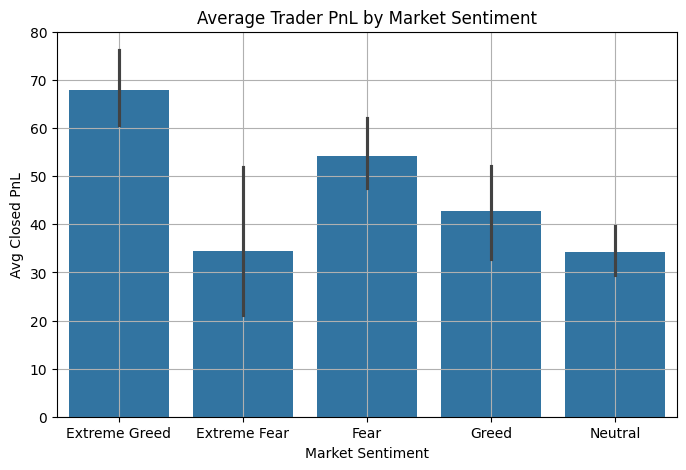

In [263]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean)
plt.title('Average Trader PnL by Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Market Sentiment')
plt.grid(True)
plt.show()


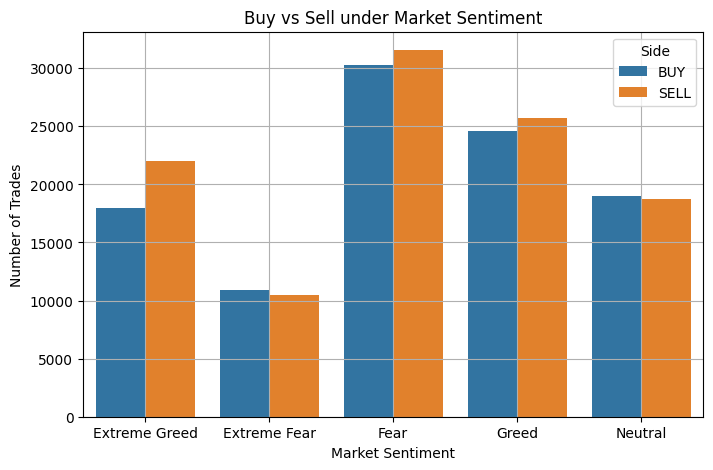

In [264]:
# 🔹 Plot 2: Trade Side Count by Sentiment
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='classification', hue='Side')
plt.title('Buy vs Sell under Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.grid(True)
plt.show()

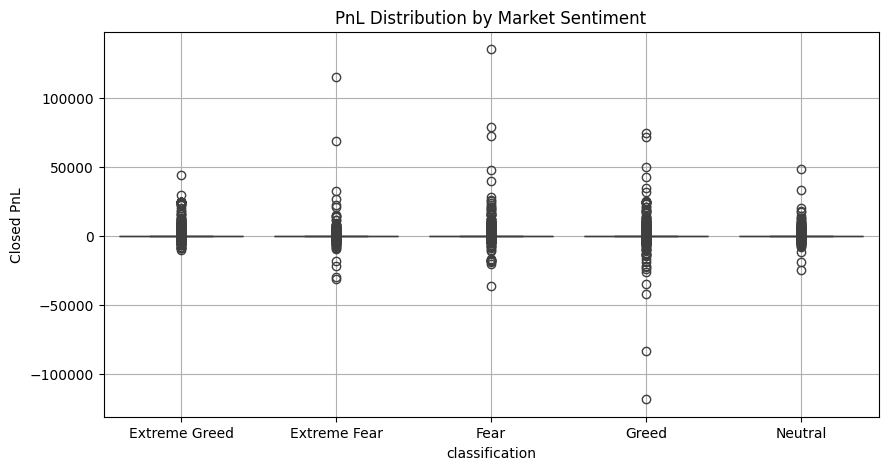

In [265]:
# 🔹 Plot 3: PnL Distribution by Sentiment
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('PnL Distribution by Market Sentiment')
plt.grid(True)
plt.show()


In [266]:
valid_coin_counts = merged_df['Coin'].value_counts()
print(valid_coin_counts.head(5))

Coin
HYPE    68005
@107    29992
BTC     26064
ETH     11158
SOL     10691
Name: count, dtype: int64


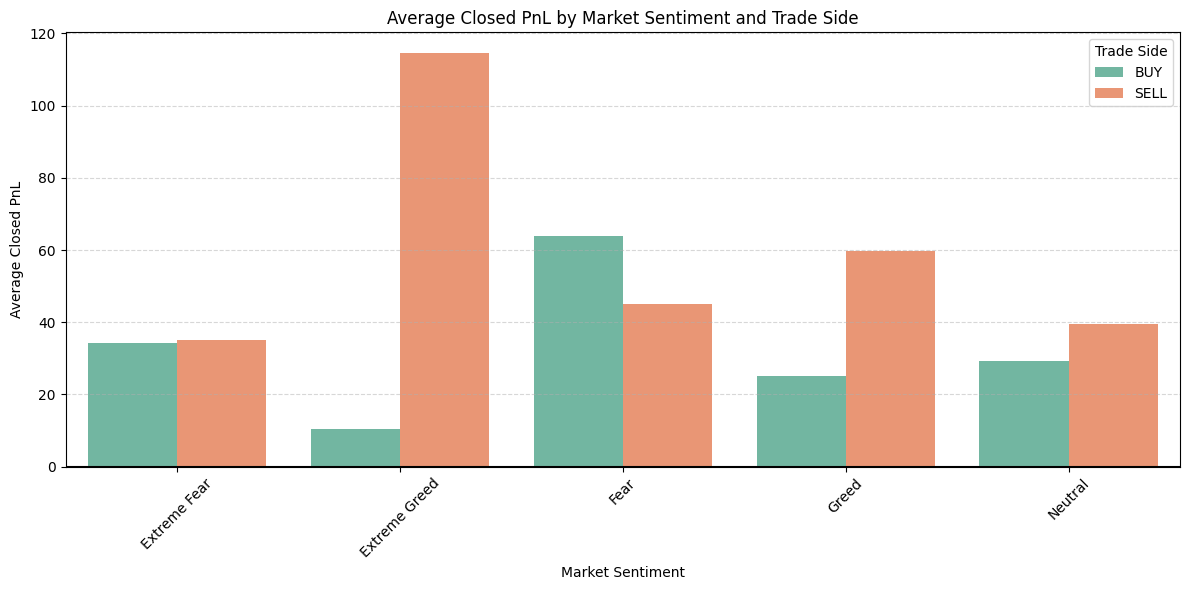

In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values just in case
filtered_df = merged_df.dropna(subset=['Closed PnL', 'Side', 'classification'])

# Ensure Closed PnL is numeric
filtered_df['Closed PnL'] = pd.to_numeric(filtered_df['Closed PnL'], errors='coerce')

# Group by Sentiment and Side, then calculate average PnL
grouped_df = filtered_df.groupby(['classification', 'Side'])['Closed PnL'].mean().reset_index()

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='classification', y='Closed PnL', hue='Side', palette='Set2')

# Style it
plt.axhline(0, color='black')
plt.title('Average Closed PnL by Market Sentiment and Trade Side')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Trade Side')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


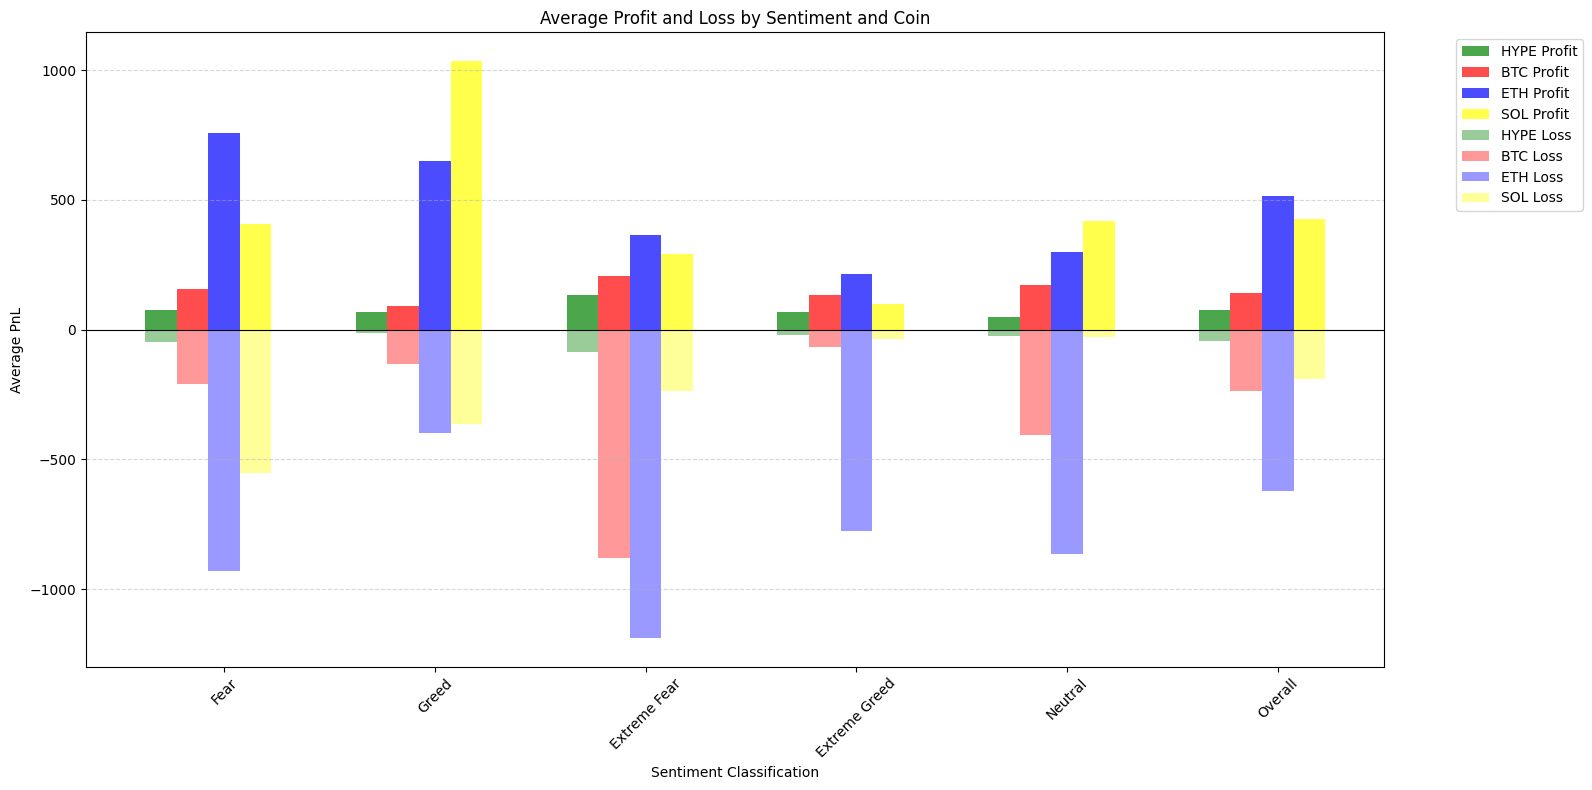

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define sentiments and coins of interest
sentiments = ['Fear', 'Greed', 'Extreme Fear', 'Extreme Greed', 'Neutral']
coins = ['HYPE', 'BTC', 'ETH', 'SOL']

# Add 'Overall' to sentiments for overall average
sentiments_with_overall = sentiments + ['Overall']

# Prepare data: average PnL (positive and negative separately) for each coin and sentiment
avg_profit = {coin: [] for coin in coins}
avg_loss = {coin: [] for coin in coins}

for sentiment in sentiments:
    for coin in coins:
        profit_mean = merged_df.loc[
            (merged_df['classification'] == sentiment) &
            (merged_df['Coin'] == coin) &
            (merged_df['Closed PnL'] > 0),
            'Closed PnL'
        ].mean()
        loss_mean = merged_df.loc[
            (merged_df['classification'] == sentiment) &
            (merged_df['Coin'] == coin) &
            (merged_df['Closed PnL'] < 0),
            'Closed PnL'
        ].mean()
        avg_profit[coin].append(profit_mean if pd.notnull(profit_mean) else 0)
        avg_loss[coin].append(loss_mean if pd.notnull(loss_mean) else 0)

# Add 'Overall' avg PnL
for coin in coins:
    profit_mean = merged_df.loc[
        (merged_df['Coin'] == coin) & (merged_df['Closed PnL'] > 0),
        'Closed PnL'
    ].mean()
    loss_mean = merged_df.loc[
        (merged_df['Coin'] == coin) & (merged_df['Closed PnL'] < 0),
        'Closed PnL'
    ].mean()
    avg_profit[coin].append(profit_mean if pd.notnull(profit_mean) else 0)
    avg_loss[coin].append(loss_mean if pd.notnull(loss_mean) else 0)

# Plot grouped bar chart
x = np.arange(len(sentiments_with_overall))
width = 0.15

plt.figure(figsize=(16, 8))
colors=["green","red","blue","yellow"]
# Plot profit bars
for i, coin in enumerate(coins):
    plt.bar(x + i * width - width*2, avg_profit[coin], width=width, label=f'{coin} Profit', color=colors[i], alpha=0.7)

# Plot loss bars
for i, coin in enumerate(coins):
    plt.bar(x + i * width - width*2, avg_loss[coin], width=width, label=f'{coin} Loss', color=colors[i], alpha=0.4, bottom=0)

# Customize plot
plt.xlabel('Sentiment Classification')
plt.ylabel('Average PnL')
plt.title('Average Profit and Loss by Sentiment and Coin')
plt.xticks(x, sentiments_with_overall, rotation=45)
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [271]:
merged_df['win'] = merged_df['Closed PnL'] > 0
win_rate_by_sentiment = merged_df.groupby('classification')['win'].mean()
print(win_rate_by_sentiment.sort_values(ascending=False))

classification
Extreme Greed    0.464943
Fear             0.420768
Neutral          0.396991
Greed            0.384828
Extreme Fear     0.370607
Name: win, dtype: float64


In [272]:
merged_df['win'].unique()

array([False,  True])

In [274]:
hypeprofcount=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Coin']=='HYPE'), 'Closed PnL'].count()
print("hype profit trading countL",hypeprofcount)
hypelosscount=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Coin']=='HYPE'), 'Closed PnL'].count()
hype=merged_df.loc[(merged_df['Coin']=='HYPE') , 'Closed PnL'].count()
print("hype loss trading countL",hypelosscount)
print("hype trading count",hype)
print("Hype coin Win Rate ",hypeprofcount/hype)
print("----------------------------------------------")
btcprofcount=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Coin']=='BTC'), 'Closed PnL'].count()
print("BTC profit trading countL",btcprofcount)
btclosscount=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Coin']=='BTC'), 'Closed PnL'].count()
btc=merged_df.loc[(merged_df['Coin']=='BTC') , 'Closed PnL'].count()
print("BTC loss trading countL",btclosscount)
print("BTC trading count",hype)
print("BTC coin Win Rate",btcprofcount/btc)
print("----------------------------------------------")
ethprofcount=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Coin']=='ETH'), 'Closed PnL'].count()
print("ETH profit trading countL",ethprofcount)
ethlosscount=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Coin']=='ETH'), 'Closed PnL'].count()
eth=merged_df.loc[(merged_df['Coin']=='ETH') , 'Closed PnL'].count()
print("ETH loss trading countL",ethlosscount)
print("ETH trading count",eth)
print("ETH coin Win Rate",ethprofcount/eth)
print("----------------------------------------------")
solprofcount=merged_df.loc[(merged_df['Closed PnL'] > 0)&(merged_df['Coin']=='SOL'), 'Closed PnL'].count()
print("SOL profit trading countL",solprofcount)
sollosscount=merged_df.loc[(merged_df['Closed PnL'] < 0)&(merged_df['Coin']=='SOL'), 'Closed PnL'].count()
SOL=merged_df.loc[(merged_df['Coin']=='SOL') , 'Closed PnL'].count()
print("SOL loss trading countL",sollosscount)
print("SOL trading count",SOL)
print("SOL coin Win Rate ",solprofcount/SOL)
#  'BTC', 'ETH', 'SOL'

hype profit trading countL 28222
hype loss trading countL 3789
hype trading count 68005
Hype coin Win Rate  0.41499889713991617
----------------------------------------------
BTC profit trading countL 9144
BTC loss trading countL 1865
BTC trading count 68005
BTC coin Win Rate 0.35082872928176795
----------------------------------------------
ETH profit trading countL 4016
ETH loss trading countL 1212
ETH trading count 11158
ETH coin Win Rate 0.3599211328195017
----------------------------------------------
SOL profit trading countL 4219
SOL loss trading countL 811
SOL trading count 10691
SOL coin Win Rate  0.394630998035731
